In [3]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
import glob
import os
import numpy as np
import sys
sys.path.append( '../src/')
from matplotlib import pyplot as plt
from compile_treeset import compile_folder , compare_treesets


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff


def graph_treedf(tree_resdf , rescols, rescols_norm , outfolder = '../figures/' , prefix = '' ):
    #sns.violinplot(tree_resdf[rescols] , hue=tree_resdf.filtered, split=True , cut =0 , bw=.15)
    if os.path.exists(outfolder ) == False:
        os.mkdir(outfolder)
    
    
    sns.set(rc={'figure.figsize':(10,8)})
    graph = sns.violinplot(tree_resdf[rescols] , cut = 0 , inner= 'box' )
    graph.axhline(max([tree_resdf[col].median() for col in rescols ]) , dashes = [2 , 1 ] )
    plt.xticks(rotation=45)
    
    
    plt.show()
    plt.savefig( outfolder + prefix + '_score.svg')

    sns.set(rc={'figure.figsize':(10,8)})
    graph = sns.violinplot(tree_resdf[rescols_norm] , cut = 0    )
    graph.axhline(max([tree_resdf[col].median() for col in rescols_norm ]) , dashes = [2 , 1 ] )
    plt.xticks(rotation=45)
    plt.show()
    
    
    plt.savefig( outfolder + prefix + '_norm_score.svg')
    
    clean = tree_resdf[rescols].dropna()
    fig = ff.create_distplot([ clean[col] for col in rescols ], [col for col in rescols] , bin_size = 150, show_rug = True)
    fig.show()
    
    

In [5]:

def compile_results(cladefolders , plotall = False, scorefunc = 'score'):
    rescols = ['lddt_1_raw_struct_tree' , 'fident_1_raw_struct_tree', 'alntmscore_1_raw_struct_tree', 'sequences' ]
    rescols_norm = ['lddt_1_raw_struct_tree'+'_norm' , 'fident_1_raw_struct_tree'+'_norm', 'alntmscore_1_raw_struct_tree'+'_norm' , 'sequences'+'_norm']

    dfs = []
    plotall = False

    for folder in cladefolders:
        #try:
        if 'logs' not in folder:
            print(folder)
            res = compile_folder(folder, scorefunc = scorefunc, verbose = False)
            if res :
                tree_resdf , refcols = res
                compare_treesets(tree_resdf  , colfilter= 'sequence' , display_lineplot = False , verbose = True)
                tree_resdf['folder'] = folder

                #add filtered bool column
                tree_resdf['filtered'] = tree_resdf['folder'].apply(lambda x : 'unfiltered' in x)

                if 'OMA' in folder:
                    dfs.append(tree_resdf)
                    if plotall == True:
                        graph_treedf(tree_resdf , rescols, rescols_norm)
                else:
                    graph_treedf(tree_resdf , rescols, rescols_norm)


    total_df = pd.concat(dfs)
    graph_treedf(total_df[total_df.filtered == False] , rescols, rescols_norm , prefix = 'OMA' )
    graph_treedf(total_df[total_df.filtered == True] , rescols, rescols_norm , prefix = 'OMA' )



In [2]:
cladefolders = ['../CATH_data/' , '../CAT_data/']# , '../SCOP_data/' ]
scorefunc = 'score'
compile_results(cladefolders )


../OMA_data/Bacteria/
../OMA_data/Bacteria/
633


processed: 19:   0%|          | 3/633 [00:00<02:09,  4.87it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG215/
29 69


processed: 46:   1%|          | 7/633 [00:01<01:39,  6.28it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG83/
15 16
nseqs != nstructs ../OMA_data/Bacteria/HOG37/
25 26


processed: 70:   1%|▏         | 9/633 [00:01<01:25,  7.26it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG56/
11 14


processed: 93:   2%|▏         | 11/633 [00:01<01:51,  5.58it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG612/
11 13


processed: 120:   3%|▎         | 18/633 [00:03<01:53,  5.43it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG133/
16 20
nseqs != nstructs ../OMA_data/Bacteria/HOG158/
20 22


processed: 136:   3%|▎         | 20/633 [00:03<01:51,  5.51it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG414/
8 13
nseqs != nstructs ../OMA_data/Bacteria/HOG538/
5 15


processed: 165:   4%|▎         | 23/633 [00:04<01:44,  5.86it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG120/
30 31


processed: 172:   4%|▍         | 25/633 [00:04<01:43,  5.86it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG117/
15 24


processed: 193:   5%|▌         | 33/633 [00:05<01:32,  6.51it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG119/
17 20
nseqs != nstructs ../OMA_data/Bacteria/HOG637/
24 27


processed: 195:   5%|▌         | 34/633 [00:06<01:49,  5.47it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG206/
35 57


processed: 248:   7%|▋         | 43/633 [00:07<01:47,  5.49it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG142/
93 100


processed: 283:   7%|▋         | 47/633 [00:08<01:47,  5.43it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG57/
16 21
nseqs != nstructs ../OMA_data/Bacteria/HOG67/
4 13
nseqs != nstructs ../OMA_data/Bacteria/HOG134/
89 124


processed: 320:   8%|▊         | 50/633 [00:09<01:53,  5.15it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG79/
4 11
nseqs != nstructs ../OMA_data/Bacteria/HOG153/
22 28


processed: 341:   8%|▊         | 52/633 [00:09<01:28,  6.53it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG310/
30 38
nseqs != nstructs ../OMA_data/Bacteria/HOG418/
15 17


processed: 383:   9%|▊         | 55/633 [00:10<01:34,  6.10it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG216/
24 25


processed: 390:   9%|▉         | 57/633 [00:10<01:26,  6.67it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG527/
10 16


processed: 396:   9%|▉         | 60/633 [00:10<01:37,  5.87it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG93/
16 21
nseqs != nstructs ../OMA_data/Bacteria/HOG353/
15 21


processed: 419:  10%|▉         | 63/633 [00:11<01:44,  5.43it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG27/
14 20
nseqs != nstructs ../OMA_data/Bacteria/HOG564/
17 20


processed: 426:  10%|█         | 65/633 [00:11<01:30,  6.30it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG253/
153 157
nseqs != nstructs ../OMA_data/Bacteria/HOG572/
6 10


processed: 487:  11%|█▏        | 72/633 [00:12<01:23,  6.69it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG646/
13 15
nseqs != nstructs ../OMA_data/Bacteria/HOG32/
23 25
nseqs != nstructs ../OMA_data/Bacteria/HOG279/
18 20


processed: 521:  12%|█▏        | 79/633 [00:13<01:23,  6.66it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG361/
31 32


processed: 527:  13%|█▎        | 80/633 [00:14<01:22,  6.70it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG88/
10 12


processed: 533:  13%|█▎        | 82/633 [00:14<01:14,  7.37it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG591/
12 15


processed: 566:  13%|█▎        | 85/633 [00:14<01:25,  6.44it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG205/
21 23
nseqs != nstructs ../OMA_data/Bacteria/HOG161/
17 19


processed: 575:  14%|█▎        | 87/633 [00:15<01:14,  7.37it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG148/
79 96


processed: 586:  14%|█▍        | 89/633 [00:15<01:29,  6.07it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG283/
3 21


processed: 608:  14%|█▍        | 90/633 [00:15<01:52,  4.81it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG71/
12 13


processed: 609:  15%|█▍        | 92/633 [00:16<01:28,  6.12it/s]

nseqs != nstructs ../OMA_data/Bacteria/HOG105/
20 21


processed: 628:  15%|█▍        | 93/633 [00:16<01:36,  5.61it/s]
/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



lddt_1_raw_struct_tree sequences
delta: 253.0 delta norm: 1.7870445501203307 WilcoxonResult(statistic=210.0, pvalue=0.2068029555613079)
fident_1_raw_struct_tree sequences
delta: 344.0 delta norm: 2.557677184854788 WilcoxonResult(statistic=80.5, pvalue=0.002986208126078565)
alntmscore_1_raw_struct_tree sequences
delta: -13.0 delta norm: -0.7089465227026145 WilcoxonResult(statistic=264.5, pvalue=0.12369484348664457)
lddt_0_raw_struct_tree sequences
delta: 238.0 delta norm: 1.5750762078884288 WilcoxonResult(statistic=240.5, pvalue=0.4735302809253713)
fident_0_raw_struct_tree sequences
delta: 168.0 delta norm: 0.6261857695842756 WilcoxonResult(statistic=334.5, pvalue=0.7968625836772709)
alntmscore_0_raw_struct_tree sequences
delta: 64.0 delta norm: 0.14991426252967918 WilcoxonResult(statistic=319.0, pvalue=0.4541513182083611)
../OMA_data/Chordata/
../OMA_data/Chordata/
786


processed: 47:   0%|          | 2/786 [00:00<04:03,  3.22it/s]

nseqs != nstructs ../OMA_data/Chordata/HOG30/
38 60


processed: 225:   1%|          | 8/786 [00:02<03:26,  3.76it/s]

nseqs != nstructs ../OMA_data/Chordata/HOG191/
28 29
nseqs != nstructs ../OMA_data/Chordata/HOG10/
327 839
nseqs != nstructs ../OMA_data/Chordata/HOG27/
8 14


processed: 230:   1%|          | 8/786 [00:02<03:26,  3.76it/s]

nseqs != nstructs ../OMA_data/Chordata/HOG981/
13 37


processed: 304:   1%|▏         | 10/786 [00:03<03:08,  4.11it/s]

nseqs != nstructs ../OMA_data/Chordata/HOG549/
8 12


processed: 421:   2%|▏         | 15/786 [00:04<03:19,  3.87it/s]

nseqs != nstructs ../OMA_data/Chordata/HOG889/
12 13


processed: 461:   3%|▎         | 20/786 [00:05<02:15,  5.66it/s]

nseqs != nstructs ../OMA_data/Chordata/HOG303/
31 33
nseqs != nstructs ../OMA_data/Chordata/HOG205/
30 32


processed: 519:   3%|▎         | 26/786 [00:06<02:38,  4.80it/s]

nseqs != nstructs ../OMA_data/Chordata/HOG12/
16 23


processed: 592:   4%|▍         | 32/786 [00:07<02:08,  5.88it/s]

nseqs != nstructs ../OMA_data/Chordata/HOG1003/
7 22
nseqs != nstructs ../OMA_data/Chordata/HOG194/
9 11


processed: 595:   4%|▍         | 34/786 [00:08<01:58,  6.35it/s]

nseqs != nstructs ../OMA_data/Chordata/HOG43/
14 42
nseqs != nstructs ../OMA_data/Chordata/HOG411/
4 28


processed: 654:   5%|▍         | 36/786 [00:08<02:13,  5.60it/s]

nseqs != nstructs ../OMA_data/Chordata/HOG260/
21 28


processed: 719:   5%|▍         | 38/786 [00:09<02:31,  4.93it/s]

nseqs != nstructs ../OMA_data/Chordata/HOG1004/
5 12
nseqs != nstructs ../OMA_data/Chordata/HOG181/
5 8


processed: 757:   5%|▌         | 40/786 [00:09<03:00,  4.14it/s]


lddt_1_raw_struct_tree sequences
delta: 6373.0 delta norm: 1.8402377663850558 WilcoxonResult(statistic=89.0, pvalue=0.8092039689931078)
fident_1_raw_struct_tree sequences
delta: 7348.0 delta norm: 3.487499657696112 WilcoxonResult(statistic=44.5, pvalue=0.07396401547262925)
alntmscore_1_raw_struct_tree sequences
delta: 4669.0 delta norm: 0.5844427022370402 WilcoxonResult(statistic=90.0, pvalue=0.5754529518891389)
lddt_0_raw_struct_tree sequences
delta: 6323.0 delta norm: 1.762526384032164 WilcoxonResult(statistic=97.0, pvalue=0.7651785898104478)
fident_0_raw_struct_tree sequences
delta: 6213.0 delta norm: 1.3186250052394068 WilcoxonResult(statistic=101.0, pvalue=0.8812824436000936)
alntmscore_0_raw_struct_tree sequences
delta: 4366.0 delta norm: 0.07463764541611739 WilcoxonResult(statistic=93.0, pvalue=0.43418687955840585)
../OMA_data/LUCA/
../OMA_data/LUCA/
880


processed: 46:   0%|          | 3/880 [00:00<02:37,  5.55it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG883/
10 30
nseqs != nstructs ../OMA_data/LUCA/HOG1025/
7 12


processed: 74:   1%|          | 5/880 [00:00<02:08,  6.80it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG945/
40 54


processed: 103:   1%|          | 10/880 [00:01<01:44,  8.36it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG527/
3 12
nseqs != nstructs ../OMA_data/LUCA/HOG50/
16 18
nseqs != nstructs ../OMA_data/LUCA/HOG1292/
32 37


processed: 170:   2%|▏         | 19/880 [00:03<01:58,  7.24it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1132/
5 20
nseqs != nstructs ../OMA_data/LUCA/HOG638/
9 53


processed: 186:   2%|▏         | 21/880 [00:03<02:01,  7.06it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG459/
25 47
nseqs != nstructs ../OMA_data/LUCA/HOG255/
39 48


processed: 200:   3%|▎         | 24/880 [00:03<01:43,  8.25it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG930/
18 22


processed: 217:   3%|▎         | 26/880 [00:03<02:07,  6.71it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1130/
28 52


processed: 233:   3%|▎         | 28/880 [00:04<01:57,  7.27it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG211/
39 64


processed: 251:   4%|▎         | 31/880 [00:04<01:42,  8.29it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1015/
3 14
nseqs != nstructs ../OMA_data/LUCA/HOG457/
20 25


processed: 272:   4%|▍         | 33/880 [00:04<02:08,  6.61it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG873/
21 26
nseqs != nstructs ../OMA_data/LUCA/HOG954/
28 29


processed: 285:   4%|▍         | 35/880 [00:05<01:42,  8.27it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG813/
11 12


processed: 288:   4%|▍         | 36/880 [00:05<01:55,  7.29it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG885/
24 33


processed: 314:   5%|▍         | 41/880 [00:06<01:54,  7.34it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG608/
43 61
nseqs != nstructs ../OMA_data/LUCA/HOG282/
58 67


processed: 320:   5%|▍         | 42/880 [00:06<01:56,  7.21it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1249/
7 11


processed: 335:   5%|▌         | 46/880 [00:06<02:15,  6.14it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG144/
59 112


processed: 405:   6%|▌         | 52/880 [00:07<02:08,  6.46it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG693/
71 77
nseqs != nstructs ../OMA_data/LUCA/HOG1053/
33 43


processed: 435:   6%|▋         | 55/880 [00:08<01:46,  7.74it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1147/
16 21
nseqs != nstructs ../OMA_data/LUCA/HOG1077/
36 59
nseqs != nstructs ../OMA_data/LUCA/HOG1343/
16 24


processed: 466:   6%|▋         | 57/880 [00:08<01:45,  7.83it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG148/
42 67
nseqs != nstructs ../OMA_data/LUCA/HOG1351/
8 12


processed: 489:   7%|▋         | 60/880 [00:09<01:55,  7.13it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1014/
9 35


processed: 519:   8%|▊         | 67/880 [00:09<01:31,  8.93it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG80/
38 65
nseqs != nstructs ../OMA_data/LUCA/HOG815/
33 35


processed: 553:   8%|▊         | 70/880 [00:10<01:50,  7.35it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1081/
17 57
nseqs != nstructs ../OMA_data/LUCA/HOG987/
17 46


processed: 558:   8%|▊         | 70/880 [00:10<01:50,  7.35it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG506/
46 53


processed: 575:   8%|▊         | 72/880 [00:10<01:54,  7.05it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1311/
11 22


processed: 596:   9%|▊         | 75/880 [00:11<02:31,  5.30it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1104/
11 22
nseqs != nstructs ../OMA_data/LUCA/HOG1168/
43 52


processed: 628:   9%|▉         | 79/880 [00:11<01:46,  7.55it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG734/
28 37


processed: 647:   9%|▉         | 81/880 [00:12<01:46,  7.47it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG697/
50 55


processed: 664:  10%|▉         | 84/880 [00:12<01:37,  8.14it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG279/
23 24


processed: 692:  10%|▉         | 86/880 [00:12<02:00,  6.59it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG606/
11 20
nseqs != nstructs ../OMA_data/LUCA/HOG1173/
4 74


processed: 703:  10%|█         | 89/880 [00:13<01:38,  8.04it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1301/
9 59
nseqs != nstructs ../OMA_data/LUCA/HOG387/
58 89


processed: 732:  11%|█         | 94/880 [00:13<01:43,  7.58it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1079/
20 28
nseqs != nstructs ../OMA_data/LUCA/HOG752/
14 37


processed: 736:  11%|█         | 96/880 [00:13<01:24,  9.26it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG631/
44 54


processed: 773:  11%|█         | 98/880 [00:14<01:54,  6.81it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG657/
78 82


processed: 790:  11%|█▏        | 101/880 [00:14<02:08,  6.08it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG9/
18 20


processed: 807:  12%|█▏        | 104/880 [00:15<01:48,  7.17it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG1084/
17 46
nseqs != nstructs ../OMA_data/LUCA/HOG1061/
16 21


processed: 839:  12%|█▏        | 107/880 [00:15<01:37,  7.95it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG760/
7 17


processed: 859:  12%|█▏        | 109/880 [00:16<02:05,  6.12it/s]

nseqs != nstructs ../OMA_data/LUCA/HOG339/
13 33
nseqs != nstructs ../OMA_data/LUCA/HOG383/
31 50


processed: 878:  12%|█▎        | 110/880 [00:16<01:53,  6.76it/s]


nseqs != nstructs ../OMA_data/LUCA/HOG1171/
12 45
lddt_1_raw_struct_tree sequences
error lddt_1_raw_struct_tree sequences
error lddt_1_raw_struct_tree sequences
fident_1_raw_struct_tree sequences
error fident_1_raw_struct_tree sequences
error fident_1_raw_struct_tree sequences
alntmscore_1_raw_struct_tree sequences
error alntmscore_1_raw_struct_tree sequences
error alntmscore_1_raw_struct_tree sequences
lddt_0_raw_struct_tree sequences
error lddt_0_raw_struct_tree sequences
error lddt_0_raw_struct_tree sequences
fident_0_raw_struct_tree sequences
error fident_0_raw_struct_tree sequences
error fident_0_raw_struct_tree sequences
alntmscore_0_raw_struct_tree sequences
error alntmscore_0_raw_struct_tree sequences
error alntmscore_0_raw_struct_tree sequences
../OMA_data/Tetrapoda/
../OMA_data/Tetrapoda/
359


processed: 17:   0%|          | 1/359 [00:00<01:18,  4.57it/s]

nseqs != nstructs ../OMA_data/Tetrapoda/HOG181/
6 17


processed: 65:   2%|▏         | 7/359 [00:01<01:11,  4.95it/s]

nseqs != nstructs ../OMA_data/Tetrapoda/HOG308/
10 18


processed: 78:   3%|▎         | 9/359 [00:01<01:01,  5.73it/s]

nseqs != nstructs ../OMA_data/Tetrapoda/HOG170/
10 11
nseqs != nstructs ../OMA_data/Tetrapoda/HOG186/
8 14


processed: 119:   3%|▎         | 12/359 [00:02<01:02,  5.56it/s]

nseqs != nstructs ../OMA_data/Tetrapoda/HOG33/
15 17
nseqs != nstructs ../OMA_data/Tetrapoda/HOG95/
5 12


processed: 157:   4%|▍         | 16/359 [00:03<01:11,  4.80it/s]

nseqs != nstructs ../OMA_data/Tetrapoda/HOG284/
4 12


processed: 161:   5%|▌         | 18/359 [00:03<00:58,  5.83it/s]

nseqs != nstructs ../OMA_data/Tetrapoda/HOG127/
7 9


processed: 189:   6%|▌         | 21/359 [00:04<01:09,  4.89it/s]

nseqs != nstructs ../OMA_data/Tetrapoda/HOG299/
7 21


processed: 193:   6%|▌         | 22/359 [00:04<01:03,  5.32it/s]

nseqs != nstructs ../OMA_data/Tetrapoda/HOG48/
17 20
nseqs != nstructs ../OMA_data/Tetrapoda/HOG337/
6 10


processed: 245:   8%|▊         | 30/359 [00:05<00:48,  6.78it/s]

nseqs != nstructs ../OMA_data/Tetrapoda/HOG73/
22 26
nseqs != nstructs ../OMA_data/Tetrapoda/HOG317/
9 34


processed: 296:  10%|▉         | 35/359 [00:07<01:14,  4.34it/s]

nseqs != nstructs ../OMA_data/Tetrapoda/HOG357/
12 31
nseqs != nstructs ../OMA_data/Tetrapoda/HOG343/
17 19


processed: 308:  11%|█         | 38/359 [00:07<00:50,  6.31it/s]

nseqs != nstructs ../OMA_data/Tetrapoda/HOG285/
38 52
nseqs != nstructs ../OMA_data/Tetrapoda/HOG212/
6 18


processed: 310:  11%|█▏        | 41/359 [00:07<00:50,  6.28it/s]

nseqs != nstructs ../OMA_data/Tetrapoda/HOG166/
4 10


processed: 350:  12%|█▏        | 44/359 [00:08<00:59,  5.25it/s]


nseqs != nstructs ../OMA_data/Tetrapoda/HOG307/
7 21
nseqs != nstructs ../OMA_data/Tetrapoda/HOG256/
7 14
lddt_1_raw_struct_tree sequences
delta: 156.0 delta norm: 0.6525930454141604 WilcoxonResult(statistic=79.0, pvalue=0.5196142846604979)
fident_1_raw_struct_tree sequences
delta: 1216.0 delta norm: 2.0010855634158164 WilcoxonResult(statistic=11.0, pvalue=0.015746296328179612)
alntmscore_1_raw_struct_tree sequences
delta: -744.0 delta norm: -0.04363407286235478 WilcoxonResult(statistic=69.0, pvalue=0.10604443846627067)
lddt_0_raw_struct_tree sequences
delta: 66.0 delta norm: 0.5172265913904565 WilcoxonResult(statistic=66.0, pvalue=0.6190554886234496)
fident_0_raw_struct_tree sequences
delta: 154.0 delta norm: 0.2121571714483123 WilcoxonResult(statistic=80.5, pvalue=0.55942963865861)
alntmscore_0_raw_struct_tree sequences
delta: -552.0 delta norm: 0.09140031948200199 WilcoxonResult(statistic=71.5, pvalue=0.1260093247841567)
../OMA_data/Opisthokonta/
../OMA_data/Opisthokonta/
523


processed: 31:   1%|          | 3/523 [00:00<01:14,  6.99it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG371/
14 15
nseqs != nstructs ../OMA_data/Opisthokonta/HOG573/
12 17


processed: 40:   1%|          | 5/523 [00:00<01:12,  7.13it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG603/
7 15
nseqs != nstructs ../OMA_data/Opisthokonta/HOG198/
7 15


processed: 70:   1%|▏         | 7/523 [00:00<01:06,  7.72it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG20/
4 15
nseqs != nstructs ../OMA_data/Opisthokonta/HOG67/
12 15


processed: 90:   2%|▏         | 9/523 [00:01<01:05,  7.85it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG309/
40 41


processed: 96:   2%|▏         | 13/523 [00:01<00:53,  9.50it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG627/
6 16
nseqs != nstructs ../OMA_data/Opisthokonta/HOG5/
11 32


processed: 101:   2%|▏         | 13/523 [00:01<00:53,  9.50it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG559/
7 20


processed: 130:   3%|▎         | 16/523 [00:02<01:08,  7.44it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG104/
7 34


processed: 145:   4%|▎         | 19/523 [00:02<01:16,  6.63it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG448/
8 51


processed: 168:   4%|▍         | 21/523 [00:03<01:46,  4.70it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG514/
4 48


processed: 184:   5%|▍         | 25/523 [00:03<01:13,  6.80it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG65/
9 13
nseqs != nstructs ../OMA_data/Opisthokonta/HOG250/
20 23
nseqs != nstructs ../OMA_data/Opisthokonta/HOG395/
5 14


processed: 228:   6%|▌         | 29/523 [00:04<01:10,  7.00it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG536/
14 16
nseqs != nstructs ../OMA_data/Opisthokonta/HOG547/
5 33


processed: 244:   7%|▋         | 34/523 [00:04<00:57,  8.51it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG77/
36 41
nseqs != nstructs ../OMA_data/Opisthokonta/HOG85/
3 21
nseqs != nstructs ../OMA_data/Opisthokonta/HOG565/
20 21


processed: 267:   7%|▋         | 38/523 [00:05<01:33,  5.21it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG108/
7 23


processed: 278:   8%|▊         | 40/523 [00:06<01:40,  4.79it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG522/
3 14
nseqs != nstructs ../OMA_data/Opisthokonta/HOG549/
28 49


processed: 299:   8%|▊         | 42/523 [00:06<01:16,  6.28it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG414/
11 23


processed: 319:   9%|▊         | 45/523 [00:06<01:00,  7.87it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG542/
25 27
nseqs != nstructs ../OMA_data/Opisthokonta/HOG373/
7 17
nseqs != nstructs ../OMA_data/Opisthokonta/HOG361/
24 27


processed: 367:   9%|▉         | 48/523 [00:07<01:18,  6.03it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG247/
9 39


processed: 392:  10%|▉         | 50/523 [00:07<01:26,  5.44it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG577/
22 31
nseqs != nstructs ../OMA_data/Opisthokonta/HOG378/
11 42


processed: 400:  10%|▉         | 52/523 [00:07<01:05,  7.18it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG227/
19 55
nseqs != nstructs ../OMA_data/Opisthokonta/HOG123/
5 46


processed: 420:  11%|█         | 57/523 [00:08<00:50,  9.27it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG245/
13 32
nseqs != nstructs ../OMA_data/Opisthokonta/HOG426/
5 35


processed: 440:  12%|█▏        | 61/523 [00:08<00:56,  8.18it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG140/
5 18


processed: 467:  12%|█▏        | 64/523 [00:09<01:12,  6.37it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG110/
15 36
nseqs != nstructs ../OMA_data/Opisthokonta/HOG26/
69 110


processed: 476:  13%|█▎        | 66/523 [00:09<00:58,  7.87it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG228/
10 17
nseqs != nstructs ../OMA_data/Opisthokonta/HOG541/
11 32


processed: 493:  13%|█▎        | 69/523 [00:09<00:49,  9.18it/s]

nseqs != nstructs ../OMA_data/Opisthokonta/HOG173/
33 46
nseqs != nstructs ../OMA_data/Opisthokonta/HOG652/
6 34


processed: 496:  13%|█▎        | 70/523 [00:10<01:07,  6.74it/s]


lddt_1_raw_struct_tree sequences
delta: -254.0 delta norm: -0.9622917515104655 WilcoxonResult(statistic=104.5, pvalue=0.07132513460936779)
fident_1_raw_struct_tree sequences
delta: 883.0 delta norm: 2.085865001503343 WilcoxonResult(statistic=81.0, pvalue=0.13933855391960334)
alntmscore_1_raw_struct_tree sequences
delta: -1812.0 delta norm: -5.617192342011586 WilcoxonResult(statistic=28.0, pvalue=0.00029539281616763435)
lddt_0_raw_struct_tree sequences
delta: -357.0 delta norm: -1.1808179533631264 WilcoxonResult(statistic=101.5, pvalue=0.05935487151145935)
fident_0_raw_struct_tree sequences
delta: -928.0 delta norm: -3.544501372505725 WilcoxonResult(statistic=60.0, pvalue=0.005816358945786271)
alntmscore_0_raw_struct_tree sequences
delta: -1614.0 delta norm: -4.932987050766722 WilcoxonResult(statistic=52.0, pvalue=0.002944408554702792)
../OMA_data/Euteleostomi/
../OMA_data/Euteleostomi/
1019


processed: 46:   0%|          | 1/1019 [00:00<04:37,  3.67it/s]

nseqs != nstructs ../OMA_data/Euteleostomi/HOG3087/
3 10


processed: 141:   0%|          | 4/1019 [00:01<05:59,  2.82it/s]

nseqs != nstructs ../OMA_data/Euteleostomi/HOG1020/
3 10
nseqs != nstructs ../OMA_data/Euteleostomi/HOG201/
3 14


processed: 162:   1%|          | 6/1019 [00:01<03:49,  4.41it/s]

nseqs != nstructs ../OMA_data/Euteleostomi/HOG2330/
49 92


processed: 212:   1%|          | 9/1019 [00:02<03:21,  5.01it/s]

nseqs != nstructs ../OMA_data/Euteleostomi/HOG1803/
3 13


processed: 280:   1%|▏         | 13/1019 [00:02<02:48,  5.98it/s]

nseqs != nstructs ../OMA_data/Euteleostomi/HOG2204/
3 10
nseqs != nstructs ../OMA_data/Euteleostomi/HOG453/
5 10
nseqs != nstructs ../OMA_data/Euteleostomi/HOG2072/
5 10


processed: 361:   1%|▏         | 15/1019 [00:03<03:49,  4.38it/s]

nseqs != nstructs ../OMA_data/Euteleostomi/HOG1730/
5 11


processed: 458:   2%|▏         | 18/1019 [00:04<05:01,  3.32it/s]

nseqs != nstructs ../OMA_data/Euteleostomi/HOG955/
4 17


processed: 507:   2%|▏         | 19/1019 [00:04<05:33,  3.00it/s]

nseqs != nstructs ../OMA_data/Euteleostomi/HOG1567/
9 14


processed: 560:   2%|▏         | 21/1019 [00:05<05:16,  3.15it/s]

nseqs != nstructs ../OMA_data/Euteleostomi/HOG2464/
7 10


processed: 680:   2%|▏         | 24/1019 [00:06<05:22,  3.09it/s]

nseqs != nstructs ../OMA_data/Euteleostomi/HOG1024/
5 26


processed: 689:   2%|▏         | 25/1019 [00:06<04:55,  3.36it/s]

nseqs != nstructs ../OMA_data/Euteleostomi/HOG1889/
41 43


processed: 723:   3%|▎         | 28/1019 [00:07<03:38,  4.53it/s]

nseqs != nstructs ../OMA_data/Euteleostomi/HOG1822/
9 11
nseqs != nstructs ../OMA_data/Euteleostomi/HOG2357/
12 18


processed: 918:   3%|▎         | 32/1019 [00:08<04:38,  3.54it/s]

nseqs != nstructs ../OMA_data/Euteleostomi/HOG2010/
8 12


processed: 988:   3%|▎         | 34/1019 [00:10<04:51,  3.37it/s]
/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3351: UserWarning:

Sample size too small for normal approximation.



lddt_1_raw_struct_tree sequences
delta: -97.0 delta norm: -0.661991173674148 WilcoxonResult(statistic=19.5, pvalue=0.06904314057509947)
fident_1_raw_struct_tree sequences
delta: 72.0 delta norm: 0.2602156334466494 WilcoxonResult(statistic=12.0, pvalue=0.7353166906373405)
alntmscore_1_raw_struct_tree sequences
delta: -281.0 delta norm: -1.5720304830685898 WilcoxonResult(statistic=18.0, pvalue=0.030123644381970006)
lddt_0_raw_struct_tree sequences
delta: -137.0 delta norm: -0.9878844663482802 WilcoxonResult(statistic=21.0, pvalue=0.04776982928536977)
fident_0_raw_struct_tree sequences
delta: -144.0 delta norm: -0.8648105772988681 WilcoxonResult(statistic=20.0, pvalue=0.041076902906488105)
alntmscore_0_raw_struct_tree sequences
delta: -318.0 delta norm: -1.732096002801124 WilcoxonResult(statistic=18.0, pvalue=0.01507568359375)
../OMA_data/Eumetazoa/
../OMA_data/Eumetazoa/
896


processed: 29:   0%|          | 1/896 [00:00<05:04,  2.94it/s]

nseqs != nstructs ../OMA_data/Eumetazoa/HOG998/
17 18


processed: 136:   1%|          | 7/896 [00:01<03:17,  4.50it/s]

nseqs != nstructs ../OMA_data/Eumetazoa/HOG1116/
13 16
nseqs != nstructs ../OMA_data/Eumetazoa/HOG347/
4 34


processed: 365:   2%|▏         | 15/896 [00:05<05:23,  2.73it/s]

nseqs != nstructs ../OMA_data/Eumetazoa/HOG562/
17 33
nseqs != nstructs ../OMA_data/Eumetazoa/HOG374/
56 100


processed: 378:   2%|▏         | 17/896 [00:05<03:43,  3.93it/s]

nseqs != nstructs ../OMA_data/Eumetazoa/HOG497/
9 13


processed: 435:   2%|▏         | 19/896 [00:06<03:24,  4.29it/s]

nseqs != nstructs ../OMA_data/Eumetazoa/HOG65/
57 58
nseqs != nstructs ../OMA_data/Eumetazoa/HOG50/
22 26


processed: 458:   3%|▎         | 23/896 [00:06<02:11,  6.65it/s]

nseqs != nstructs ../OMA_data/Eumetazoa/HOG1420/
4 11
nseqs != nstructs ../OMA_data/Eumetazoa/HOG180/
79 88


processed: 459:   3%|▎         | 24/896 [00:06<02:35,  5.59it/s]

nseqs != nstructs ../OMA_data/Eumetazoa/HOG653/
4 25


processed: 527:   3%|▎         | 28/896 [00:07<02:56,  4.91it/s]

nseqs != nstructs ../OMA_data/Eumetazoa/HOG870/
48 74
nseqs != nstructs ../OMA_data/Eumetazoa/HOG1469/
11 13


processed: 565:   3%|▎         | 31/896 [00:08<02:52,  5.02it/s]

nseqs != nstructs ../OMA_data/Eumetazoa/HOG255/
4 27
nseqs != nstructs ../OMA_data/Eumetazoa/HOG368/
99 111


processed: 675:   4%|▍         | 40/896 [00:09<02:37,  5.42it/s]

nseqs != nstructs ../OMA_data/Eumetazoa/HOG521/
20 22


processed: 708:   5%|▌         | 46/896 [00:10<01:56,  7.32it/s]

nseqs != nstructs ../OMA_data/Eumetazoa/HOG631/
4 20
nseqs != nstructs ../OMA_data/Eumetazoa/HOG1421/
13 24
nseqs != nstructs ../OMA_data/Eumetazoa/HOG1041/
6 16
nseqs != nstructs ../OMA_data/Eumetazoa/HOG197/
13 18


processed: 751:   6%|▌         | 51/896 [00:11<02:16,  6.18it/s]

nseqs != nstructs ../OMA_data/Eumetazoa/HOG1451/
12 27
nseqs != nstructs ../OMA_data/Eumetazoa/HOG877/
12 16


processed: 800:   6%|▌         | 54/896 [00:12<01:50,  7.62it/s]

nseqs != nstructs ../OMA_data/Eumetazoa/HOG553/
5 18
nseqs != nstructs ../OMA_data/Eumetazoa/HOG714/
13 15


processed: 889:   7%|▋         | 63/896 [00:13<02:59,  4.64it/s]


nseqs != nstructs ../OMA_data/Eumetazoa/HOG767/
6 35
lddt_1_raw_struct_tree sequences
delta: 1006.0 delta norm: 1.0758792002690933 WilcoxonResult(statistic=177.5, pvalue=0.38696726384328684)
fident_1_raw_struct_tree sequences
delta: 1965.0 delta norm: 4.2958946509647244 WilcoxonResult(statistic=92.5, pvalue=0.020376989766076156)
alntmscore_1_raw_struct_tree sequences
delta: 56.0 delta norm: -0.6837119516036614 WilcoxonResult(statistic=138.5, pvalue=0.1418729310648753)
lddt_0_raw_struct_tree sequences
delta: 856.0 delta norm: 0.28629603962101147 WilcoxonResult(statistic=140.5, pvalue=0.3739833359372938)
fident_0_raw_struct_tree sequences
delta: 919.0 delta norm: 0.44644012522118537 WilcoxonResult(statistic=167.5, pvalue=0.41882344258739235)
alntmscore_0_raw_struct_tree sequences
delta: -140.0 delta norm: -1.2613534215007023 WilcoxonResult(statistic=135.0, pvalue=0.12151235710849262)
../OMA_data/Bilateria/
../OMA_data/Bilateria/
558


processed: 13:   0%|          | 1/558 [00:00<01:43,  5.41it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG298/
31 48


processed: 14:   0%|          | 1/558 [00:00<01:43,  5.41it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG371/
19 25


processed: 67:   1%|          | 5/558 [00:00<01:05,  8.43it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG991/
8 31
nseqs != nstructs ../OMA_data/Bilateria/HOG394/
3 12


processed: 99:   1%|▏         | 7/558 [00:01<01:34,  5.81it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG541/
13 15


processed: 118:   2%|▏         | 9/558 [00:01<01:38,  5.56it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG56/
11 14


processed: 144:   2%|▏         | 11/558 [00:02<01:57,  4.65it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG204/
15 29
nseqs != nstructs ../OMA_data/Bilateria/HOG1022/
7 11


processed: 280:   3%|▎         | 18/558 [00:03<02:00,  4.48it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG843/
6 23


processed: 337:   4%|▍         | 24/558 [00:04<01:35,  5.62it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG921/
19 20
nseqs != nstructs ../OMA_data/Bilateria/HOG303/
4 18
nseqs != nstructs ../OMA_data/Bilateria/HOG3/
3 30


processed: 358:   4%|▍         | 25/558 [00:05<01:38,  5.39it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG962/
12 13
nseqs != nstructs ../OMA_data/Bilateria/HOG939/
4 15


processed: 378:   5%|▌         | 29/558 [00:05<01:12,  7.33it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG667/
3 32
nseqs != nstructs ../OMA_data/Bilateria/HOG40/
8 14
nseqs != nstructs ../OMA_data/Bilateria/HOG448/
11 22


processed: 402:   6%|▋         | 35/558 [00:06<00:58,  8.97it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG156/
12 29
nseqs != nstructs ../OMA_data/Bilateria/HOG728/
5 15
nseqs != nstructs ../OMA_data/Bilateria/HOG127/
6 19


processed: 419:   7%|▋         | 37/558 [00:06<01:10,  7.35it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG340/
23 28


processed: 425:   7%|▋         | 38/558 [00:06<01:25,  6.09it/s]

nseqs != nstructs ../OMA_data/Bilateria/HOG984/
5 12


processed: 550:   8%|▊         | 44/558 [00:09<01:47,  4.80it/s]


lddt_1_raw_struct_tree sequences
delta: 1786.0 delta norm: 3.13212867587017 WilcoxonResult(statistic=78.0, pvalue=0.7439202218465143)
fident_1_raw_struct_tree sequences
delta: 2765.0 delta norm: 5.272903903104327 WilcoxonResult(statistic=18.0, pvalue=0.01696959812866174)
alntmscore_1_raw_struct_tree sequences
delta: 1204.0 delta norm: 2.453523769278441 WilcoxonResult(statistic=81.0, pvalue=0.8446102947853842)
lddt_0_raw_struct_tree sequences
delta: 1805.0 delta norm: 3.3031216427468575 WilcoxonResult(statistic=85.0, pvalue=0.6873436403522856)
fident_0_raw_struct_tree sequences
delta: 1793.0 delta norm: 2.6500870071120106 WilcoxonResult(statistic=98.0, pvalue=0.7938214901244397)
alntmscore_0_raw_struct_tree sequences
delta: 1100.0 delta norm: 1.9426937922726748 WilcoxonResult(statistic=93.0, pvalue=0.9358520318812181)
../OMA_data/Fungi/
../OMA_data/Fungi/
138


processed: 5:   1%|▏         | 2/138 [00:00<00:07, 18.46it/s]

nseqs != nstructs ../OMA_data/Fungi/HOG137/
4 11
nseqs != nstructs ../OMA_data/Fungi/HOG127/
9 14


processed: 18:   3%|▎         | 4/138 [00:00<00:18,  7.10it/s]

nseqs != nstructs ../OMA_data/Fungi/HOG136/
3 12


processed: 36:   5%|▌         | 7/138 [00:01<00:25,  5.07it/s]

nseqs != nstructs ../OMA_data/Fungi/HOG110/
6 12
nseqs != nstructs ../OMA_data/Fungi/HOG88/
11 13


processed: 44:   9%|▊         | 12/138 [00:01<00:18,  6.83it/s]

nseqs != nstructs ../OMA_data/Fungi/HOG49/
7 11
nseqs != nstructs ../OMA_data/Fungi/HOG101/
6 13
nseqs != nstructs ../OMA_data/Fungi/HOG113/
10 12


processed: 53:  10%|█         | 14/138 [00:02<00:19,  6.45it/s]

nseqs != nstructs ../OMA_data/Fungi/HOG85/
9 11
nseqs != nstructs ../OMA_data/Fungi/HOG108/
5 12


processed: 112:  15%|█▌        | 21/138 [00:04<00:42,  2.78it/s]

nseqs != nstructs ../OMA_data/Fungi/HOG28/
3 31


processed: 127:  20%|█▉        | 27/138 [00:05<00:24,  4.53it/s]

nseqs != nstructs ../OMA_data/Fungi/HOG87/
10 12


processed: 131:  21%|██        | 29/138 [00:06<00:21,  5.10it/s]

nseqs != nstructs ../OMA_data/Fungi/HOG3/
5 11
nseqs != nstructs ../OMA_data/Fungi/HOG129/
5 13


processed: 136:  22%|██▏       | 31/138 [00:06<00:17,  6.19it/s]

nseqs != nstructs ../OMA_data/Fungi/HOG116/
8 13


processed: 138:  24%|██▍       | 33/138 [00:06<00:20,  5.03it/s]


nseqs != nstructs ../OMA_data/Fungi/HOG99/
6 12
nseqs != nstructs ../OMA_data/Fungi/HOG92/
10 12
lddt_1_raw_struct_tree sequences
delta: 72 delta norm: 0.5763855093734389 WilcoxonResult(statistic=50.0, pvalue=0.8751996893303613)
fident_1_raw_struct_tree sequences
delta: 155 delta norm: 1.604314730155423 WilcoxonResult(statistic=23.5, pvalue=0.12256476432546977)
alntmscore_1_raw_struct_tree sequences
delta: -23 delta norm: -0.5105211688654712 WilcoxonResult(statistic=36.5, pvalue=0.1817067607219387)
lddt_0_raw_struct_tree sequences
delta: 109.0 delta norm: 0.9342546764164397 WilcoxonResult(statistic=40.5, pvalue=0.7265272954412638)
fident_0_raw_struct_tree sequences
delta: 62.0 delta norm: 0.306308279029745 WilcoxonResult(statistic=43.5, pvalue=0.5717974534440897)
alntmscore_0_raw_struct_tree sequences
delta: 12.0 delta norm: 0.11671715226179841 WilcoxonResult(statistic=30.5, pvalue=0.5047392591799146)
../OMA_data/Dikarya/
../OMA_data/Dikarya/
186


processed: 5:   1%|          | 2/186 [00:00<00:16, 10.82it/s]

nseqs != nstructs ../OMA_data/Dikarya/HOG166/
3 12


processed: 11:   2%|▏         | 4/186 [00:00<00:17, 10.51it/s]

nseqs != nstructs ../OMA_data/Dikarya/HOG114/
14 22
nseqs != nstructs ../OMA_data/Dikarya/HOG9/
6 46


processed: 15:   2%|▏         | 4/186 [00:00<00:17, 10.51it/s]

nseqs != nstructs ../OMA_data/Dikarya/HOG57/
8 11


processed: 33:   4%|▍         | 7/186 [00:00<00:21,  8.38it/s]

nseqs != nstructs ../OMA_data/Dikarya/HOG152/
9 13
nseqs != nstructs ../OMA_data/Dikarya/HOG73/
10 12


processed: 43:   5%|▍         | 9/186 [00:01<00:26,  6.60it/s]

nseqs != nstructs ../OMA_data/Dikarya/HOG161/
7 12
nseqs != nstructs ../OMA_data/Dikarya/HOG154/
5 21


processed: 55:   6%|▋         | 12/186 [00:01<00:29,  5.82it/s]

nseqs != nstructs ../OMA_data/Dikarya/HOG134/
4 19
nseqs != nstructs ../OMA_data/Dikarya/HOG64/
8 11


processed: 75:   8%|▊         | 14/186 [00:02<00:30,  5.56it/s]

nseqs != nstructs ../OMA_data/Dikarya/HOG144/
4 11
nseqs != nstructs ../OMA_data/Dikarya/HOG155/
3 11


processed: 84:   9%|▊         | 16/186 [00:02<00:28,  5.92it/s]

nseqs != nstructs ../OMA_data/Dikarya/HOG146/
11 12


processed: 87:  10%|▉         | 18/186 [00:02<00:27,  6.18it/s]

nseqs != nstructs ../OMA_data/Dikarya/HOG4/
9 13


processed: 94:  11%|█         | 20/186 [00:03<00:29,  5.72it/s]

nseqs != nstructs ../OMA_data/Dikarya/HOG47/
6 11


processed: 98:  12%|█▏        | 22/186 [00:03<00:27,  5.92it/s]

nseqs != nstructs ../OMA_data/Dikarya/HOG116/
4 15
nseqs != nstructs ../OMA_data/Dikarya/HOG42/
10 11


processed: 107:  13%|█▎        | 25/186 [00:03<00:25,  6.30it/s]

nseqs != nstructs ../OMA_data/Dikarya/HOG32/
4 11
nseqs != nstructs ../OMA_data/Dikarya/HOG46/
6 11


processed: 121:  14%|█▍        | 26/186 [00:03<00:26,  5.94it/s]

nseqs != nstructs ../OMA_data/Dikarya/HOG27/
7 11


processed: 132:  15%|█▌        | 28/186 [00:04<00:29,  5.27it/s]

nseqs != nstructs ../OMA_data/Dikarya/HOG8/
9 11
nseqs != nstructs ../OMA_data/Dikarya/HOG38/
4 12


processed: 148:  18%|█▊        | 33/186 [00:05<00:26,  5.88it/s]

nseqs != nstructs ../OMA_data/Dikarya/HOG15/
16 18


processed: 167:  20%|██        | 38/186 [00:06<00:25,  5.82it/s]

nseqs != nstructs ../OMA_data/Dikarya/HOG0/
4 41
nseqs != nstructs ../OMA_data/Dikarya/HOG76/
6 13
nseqs != nstructs ../OMA_data/Dikarya/HOG16/
5 11


processed: 183:  22%|██▏       | 41/186 [00:06<00:21,  6.86it/s]

nseqs != nstructs ../OMA_data/Dikarya/HOG147/
12 13


processed: 183:  22%|██▏       | 41/186 [00:06<00:23,  6.09it/s]


lddt_1_raw_struct_tree sequences
delta: 457 delta norm: 2.3714222186784943 WilcoxonResult(statistic=15.0, pvalue=0.10916025906553788)
fident_1_raw_struct_tree sequences
delta: 486 delta norm: 2.762741366035583 WilcoxonResult(statistic=2.0, pvalue=0.009161227493386)
alntmscore_1_raw_struct_tree sequences
delta: 278 delta norm: 1.4688969898620106 WilcoxonResult(statistic=38.0, pvalue=0.9374489089506656)
lddt_0_raw_struct_tree sequences
delta: 393 delta norm: 1.3272595191487155 WilcoxonResult(statistic=30.5, pvalue=0.504410939972533)
fident_0_raw_struct_tree sequences
delta: 350 delta norm: 1.2691350212503407 WilcoxonResult(statistic=26.0, pvalue=0.8784817434328712)
alntmscore_0_raw_struct_tree sequences
delta: 274 delta norm: 0.5847060878680322 WilcoxonResult(statistic=32.0, pvalue=0.5827745415043184)
../OMA_data/Eukaryota/
../OMA_data/Eukaryota/
605


processed: 12:   1%|          | 4/605 [00:00<01:20,  7.50it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG727/
20 36
nseqs != nstructs ../OMA_data/Eukaryota/HOG853/
48 130


processed: 42:   1%|▏         | 8/605 [00:01<01:18,  7.65it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1071/
39 47
nseqs != nstructs ../OMA_data/Eukaryota/HOG1827/
17 30
nseqs != nstructs ../OMA_data/Eukaryota/HOG1753/
35 39


processed: 60:   2%|▏         | 10/605 [00:01<01:04,  9.17it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1607/
28 30


processed: 84:   3%|▎         | 16/605 [00:02<01:08,  8.57it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG129/
64 67
nseqs != nstructs ../OMA_data/Eukaryota/HOG1140/
17 40


processed: 101:   3%|▎         | 18/605 [00:02<01:33,  6.31it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG679/
41 42


processed: 119:   4%|▎         | 22/605 [00:03<01:46,  5.45it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2110/
24 35
nseqs != nstructs ../OMA_data/Eukaryota/HOG1781/
30 35


processed: 135:   4%|▍         | 24/605 [00:03<01:17,  7.47it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG425/
3 44
nseqs != nstructs ../OMA_data/Eukaryota/HOG2822/
21 23


processed: 165:   4%|▍         | 26/605 [00:03<01:28,  6.55it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2279/
7 30


processed: 187:   5%|▍         | 29/605 [00:04<01:27,  6.58it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1059/
19 21


processed: 189:   5%|▍         | 29/605 [00:04<01:27,  6.58it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1539/
6 19


processed: 206:   5%|▌         | 32/605 [00:04<01:25,  6.71it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG554/
12 61
nseqs != nstructs ../OMA_data/Eukaryota/HOG2670/
57 70


processed: 211:   5%|▌         | 33/605 [00:04<01:22,  6.95it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG981/
30 44


processed: 247:   6%|▌         | 36/605 [00:05<01:27,  6.47it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2635/
16 47


processed: 286:   7%|▋         | 42/605 [00:06<01:32,  6.06it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG248/
33 37
nseqs != nstructs ../OMA_data/Eukaryota/HOG2660/
3 25


processed: 308:   8%|▊         | 46/605 [00:07<01:40,  5.57it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2393/
12 47


processed: 316:   8%|▊         | 47/605 [00:07<01:28,  6.29it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2107/
32 36


processed: 322:   8%|▊         | 50/605 [00:07<01:11,  7.76it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1362/
17 66
nseqs != nstructs ../OMA_data/Eukaryota/HOG2840/
14 44


processed: 342:   9%|▉         | 53/605 [00:07<00:57,  9.66it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG100/
47 66
nseqs != nstructs ../OMA_data/Eukaryota/HOG155/
49 58
nseqs != nstructs ../OMA_data/Eukaryota/HOG2360/
12 24


processed: 362:   9%|▉         | 56/605 [00:08<00:52, 10.44it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG3096/
16 25
nseqs != nstructs ../OMA_data/Eukaryota/HOG613/
32 51


processed: 377:  10%|▉         | 58/605 [00:08<01:00,  8.97it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2016/
12 32


processed: 394:  10%|▉         | 60/605 [00:09<01:30,  6.03it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1705/
9 24


processed: 421:  10%|█         | 62/605 [00:09<01:36,  5.61it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG459/
13 48
nseqs != nstructs ../OMA_data/Eukaryota/HOG3192/
4 35
nseqs != nstructs ../OMA_data/Eukaryota/HOG2240/
28 44


processed: 432:  11%|█         | 66/605 [00:09<00:55,  9.66it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1433/
12 30
nseqs != nstructs ../OMA_data/Eukaryota/HOG2945/
22 29
nseqs != nstructs ../OMA_data/Eukaryota/HOG61/
13 46


processed: 462:  12%|█▏        | 70/605 [00:10<01:20,  6.67it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2859/
6 12


processed: 501:  12%|█▏        | 73/605 [00:10<01:15,  7.03it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG133/
17 33
nseqs != nstructs ../OMA_data/Eukaryota/HOG110/
3 70


processed: 515:  12%|█▏        | 75/605 [00:11<01:14,  7.15it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG490/
32 44


processed: 533:  13%|█▎        | 77/605 [00:11<01:08,  7.70it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1060/
28 45
nseqs != nstructs ../OMA_data/Eukaryota/HOG965/
8 25


processed: 555:  13%|█▎        | 79/605 [00:11<01:11,  7.39it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG1084/
17 48


processed: 568:  13%|█▎        | 81/605 [00:12<01:34,  5.53it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG540/
52 64
nseqs != nstructs ../OMA_data/Eukaryota/HOG615/
6 56


processed: 584:  14%|█▍        | 86/605 [00:12<01:14,  6.93it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG2068/
4 26
nseqs != nstructs ../OMA_data/Eukaryota/HOG2586/
3 18
nseqs != nstructs ../OMA_data/Eukaryota/HOG2971/
3 21


processed: 598:  15%|█▍        | 89/605 [00:13<01:02,  8.30it/s]

nseqs != nstructs ../OMA_data/Eukaryota/HOG452/
94 97
nseqs != nstructs ../OMA_data/Eukaryota/HOG1551/
17 19
nseqs != nstructs ../OMA_data/Eukaryota/HOG1627/
28 34


processed: 605:  15%|█▌        | 93/605 [00:13<01:15,  6.82it/s]


lddt_1_raw_struct_tree sequences
delta: 1811.0 delta norm: -1.917153059239494 WilcoxonResult(statistic=114.0, pvalue=0.04266392954421394)
fident_1_raw_struct_tree sequences
delta: 4946.0 delta norm: 2.424057515344656 WilcoxonResult(statistic=161.0, pvalue=0.33868237462469764)
alntmscore_1_raw_struct_tree sequences
delta: -927.0 delta norm: -4.616812095733913 WilcoxonResult(statistic=108.0, pvalue=0.017897082542391966)
lddt_0_raw_struct_tree sequences
delta: 2333.0 delta norm: -1.6904123158269853 WilcoxonResult(statistic=116.5, pvalue=0.08151927387780179)
fident_0_raw_struct_tree sequences
delta: 2091.0 delta norm: -2.3447611425553623 WilcoxonResult(statistic=89.5, pvalue=0.028932707856921175)
alntmscore_0_raw_struct_tree sequences
delta: -1629.0 delta norm: -6.485224094543067 WilcoxonResult(statistic=84.0, pvalue=0.0038930850466589546)


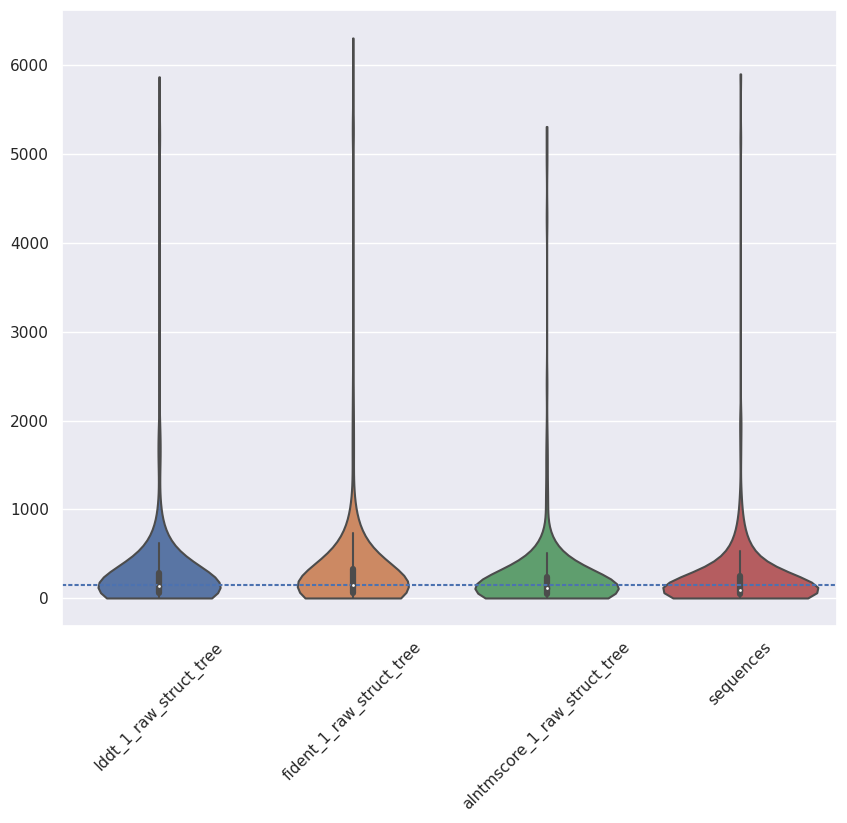

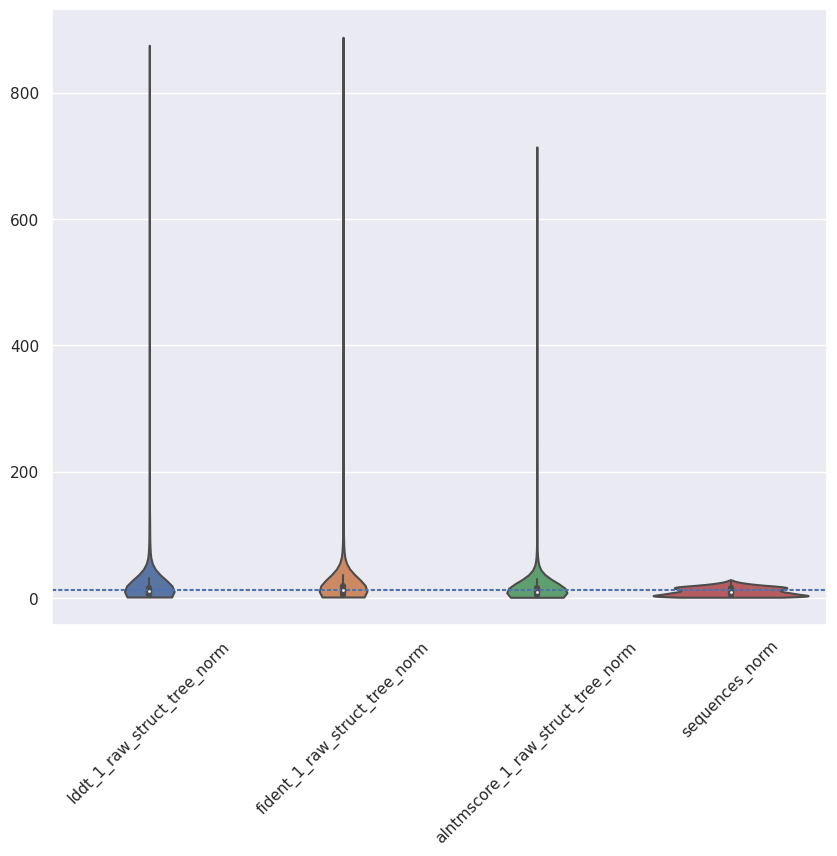

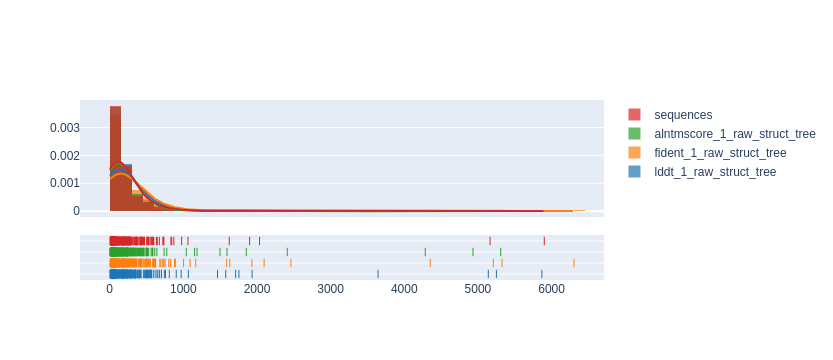

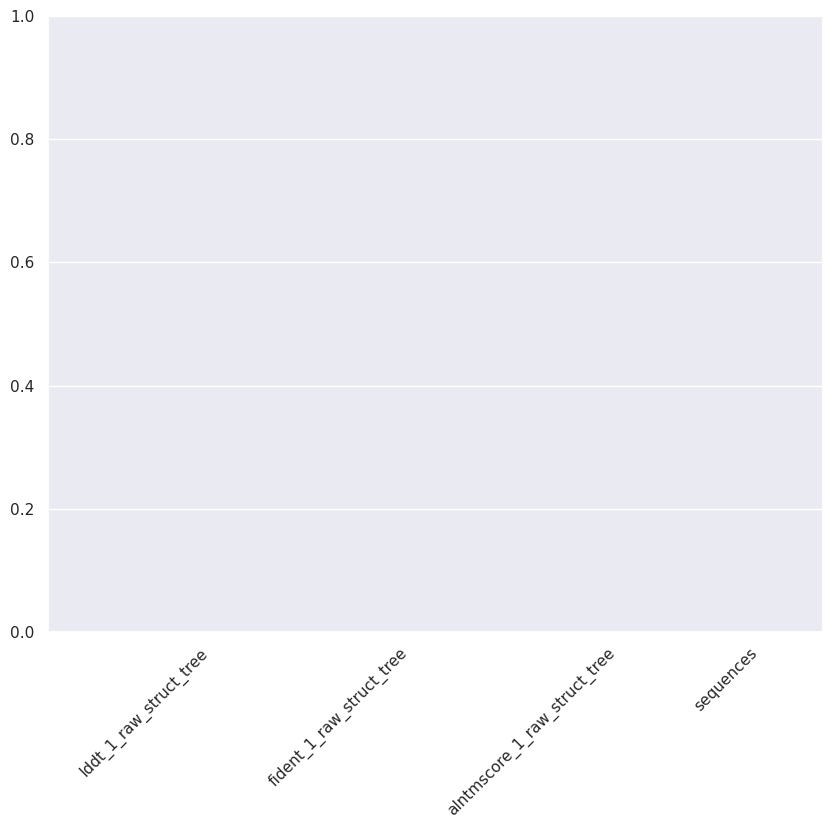

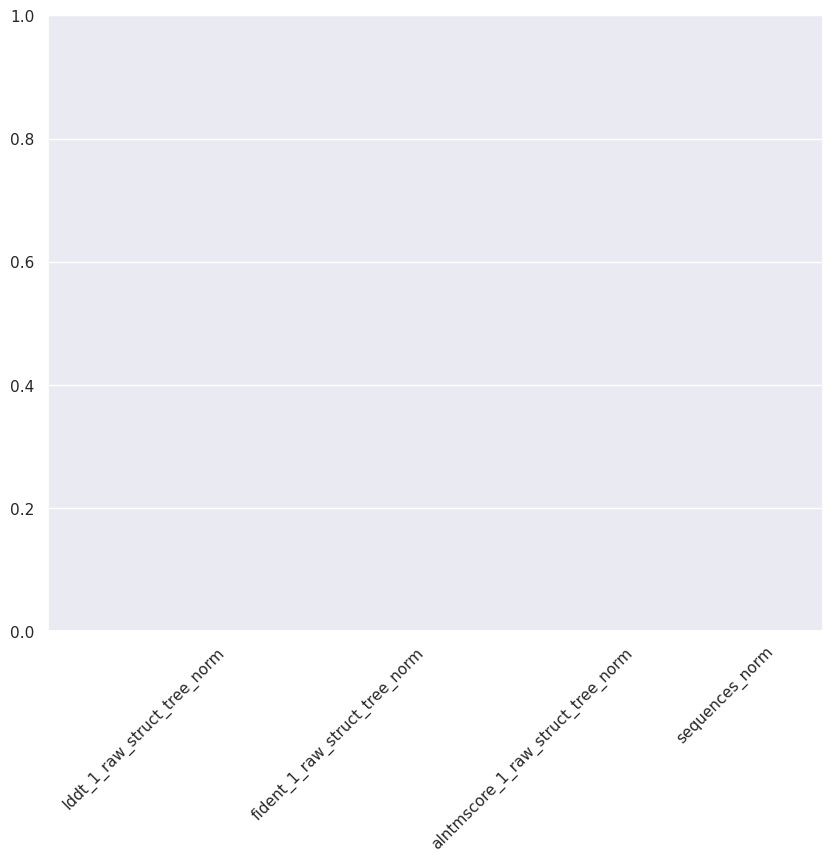

ValueError: min() arg is an empty sequence

<Figure size 1000x800 with 0 Axes>

In [6]:
#todo iterate over hogs and cath and train a model

cladefolders = set(glob.glob( '../OMA_data/*/' ))-set([ '../OMA_data/logs/' ])
cladefolders = cladefolders.union( set(glob.glob( '../OMA_data_unfiltered/OMA_data/*/' )) - set([ '../OMA_data_unfiltered/logs/' ]) )
cladefolders = set(glob.glob( '../OMA_data/*/' ))-set([ '../OMA_data/logs/' ])
compile_results(cladefolders )

In [13]:
#plt the OMA clades w and without filtering 
#plot the cat and cath and total oma with and without filtering


In [10]:
#construct structure and sequence feature dataset

def ret_description(vec , label = ''):
    return { label+'_mean': np.mean(vec) , label+'_max': np.amax(vec) , label+'_min': np.amin(vec) ,label+'_var': np.var(vec) }

allfolders = glob.glob(cladefolders)
dfs = []
print(allfolders)
for clade in allfolders:
    print(clade)
    res = {}
    folders = glob.glob(clade + '*/' )
    for folder in folders:
        if os.path.isfile(folder + 'plddt.json' ) and os.path.isfile(folder + 'sequence_dataset.csv' ) :
            plddt_df = pd.read_json(folder + 'plddt.json').T
            if len(plddt_df)>0:
                try:
                    plddt_df.columns = 'nobs,minmax,mean,variance,skewness,kurtosis'.split(',')
                    plddt_df['min'] = plddt_df.minmax.map( lambda r: r[0] )
                    plddt_df['max'] = plddt_df.minmax.map( lambda r: r[1] )
                    res[folder] = {}
                    for col in ['nobs', 'min' , 'max' , 'mean' , 'variance' , 'skewness' , 'kurtosis' ]:
                        descriptors = ret_description(plddt_df[col] , label = col)
                        for l in descriptors:
                            res[folder][l] = descriptors[l]
                    #add in some descriptors of the taxonomic spread and sequence set
                    seqdf = pd.read_csv(folder+'sequence_dataset.csv' )
                    res[folder]['nprots'] = len(seqdf)
                    cladesets = [ set(l.split(',')) for l in  seqdf['Taxonomic lineage (Ids)'] ]
                    union_all = cladesets[0]
                    intersection_all = cladesets[0]
                    for c in cladesets:
                        union_all = union_all.union(c)
                        intersection_all.intersection(c)
                    res[folder]['n_clades'] = len(union_all)
                    res[folder]['inter_clades'] = len(intersection_all)
                    res[folder]['inter/nc'] =  res[folder]['inter_clades'] /  res[folder]['n_clades'] 
                    res[folder]['nc/np'] = res[folder]['nprots'] / res[folder]['n_clades']
                except:
                    pass
    resdf = pd.DataFrame.from_dict(res, orient = 'index')
    dfs.append(resdf)
seqset_resdf = pd.concat(dfs)



TypeError: 'set' object is not subscriptable

In [ ]:
print(seqset_resdf)
seqset_resdf.to_csv('structure_and_sequence_qcmetrics.csv')

                                                      nobs_mean  nobs_max  \
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   807.250000       985   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   521.944444       811   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   401.434783       516   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...    64.357143        71   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   204.133333       215   
...                                                         ...       ...   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...  1041.034884      1191   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   446.782609       581   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   351.106061       480   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   384.966102       506   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   890.472222      1124   

                                                    nobs_min     nobs_var  

In [ ]:
#add to the tree comparison data
tree_resdf = tree_resdf.merge( seqset_resdf , left_index = True, right_index = True, how = 'inner' )
print(tree_resdf)

                                                    struct_tree.nwk.PP.nwk.rooted  \
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             52   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             76   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            141   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             33   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             59   
...                                                                           ...   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                           1022   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            123   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            642   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            660   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...               

In [ ]:
print(tree_resdf.columns)

Index(['struct_tree.nwk.PP.nwk.rooted', 'core_tree.nwk.PP.nwk.rooted',
       'sequences.aln.fst.nwk.rooted', 'delta', 'max', 'delta_norm', 'clade',
       'HOG', 'nobs_mean', 'nobs_max', 'nobs_min', 'nobs_var', 'min_mean',
       'min_max', 'min_min', 'min_var', 'max_mean', 'max_max', 'max_min',
       'max_var', 'mean_mean', 'mean_max', 'mean_min', 'mean_var',
       'variance_mean', 'variance_max', 'variance_min', 'variance_var',
       'skewness_mean', 'skewness_max', 'skewness_min', 'skewness_var',
       'kurtosis_mean', 'kurtosis_max', 'kurtosis_min', 'kurtosis_var',
       'nprots', 'n_clades', 'inter_clades', 'inter/nc', 'nc/np'],
      dtype='object')


In [ ]:
#try to predict the delta using these features w gradient boosted trees
#try to predict the RF distance as well

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [ ]:
X, y = tree_resdf[['nobs_mean', 'nobs_max',
       'nobs_min', 'nobs_var', 'min_mean', 'min_max', 'min_min', 'min_var',
       'max_mean', 'max_max', 'max_min', 'max_var', 'mean_mean', 'mean_max',
       'mean_min', 'mean_var', 'variance_mean', 'variance_max', 'variance_min',
       'variance_var', 'skewness_mean', 'skewness_max', 'skewness_min',
       'skewness_var', 'kurtosis_mean', 'kurtosis_max', 'kurtosis_min',
       'kurtosis_var', 'nprots', 'n_clades', 'inter_clades', 'inter/nc',
       'nc/np']], tree_resdf.delta_norm

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}


reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

The mean squared error (MSE) on test set: 0.0042


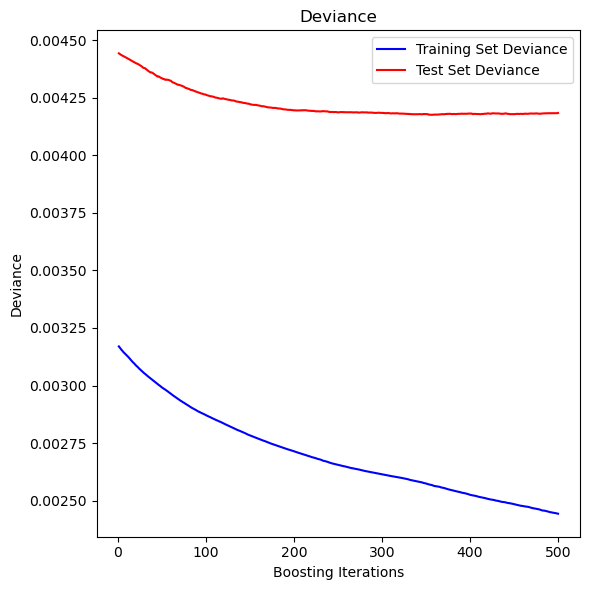

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

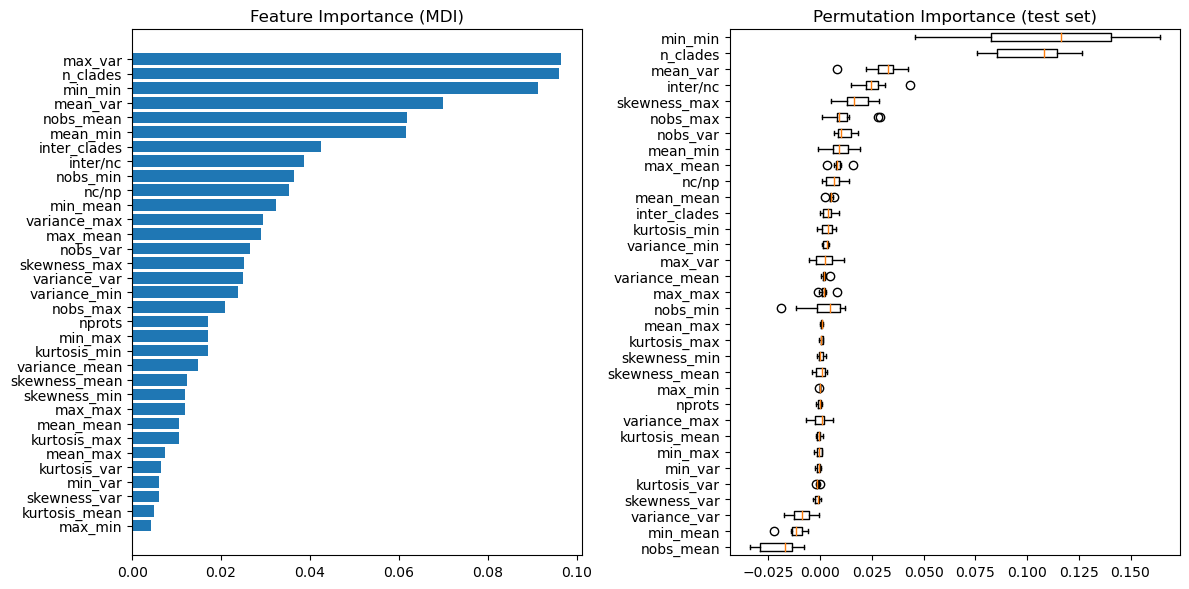

In [ ]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()